#  Sai Rohith Enumala

## Research question/interests

We are interested in Toronto's Airbnb listings (dataset) as it contains a multitude of elements including neighborhoods, pricing, ratings, and whether or not the host is a super host. 

Research Question: 

I want to analyse whether the category of hosts have a jounce on the prices of the listings, based on the number of people it accomodates.

I also want to analysie,on average, which of the two categories of hosts tends to keep the property (listing) clean, based on the cleanliness reviews by the customers.

In [289]:
import pandas as pd

In [290]:
df = pd.read_csv ("../data/raw/listings.csv")

In [291]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210806113117,2021-08-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
1,8077,https://www.airbnb.com/rooms/8077,20210806113117,2021-08-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.56
2,23691,https://www.airbnb.com/rooms/23691,20210806113117,2021-08-07,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,...,4.93,4.34,4.73,NaN,t,2,0,2,0,1.79
3,27423,https://www.airbnb.com/rooms/27423,20210806113117,2021-08-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,https://www.airbnb.com/users/show/118124,...,5.00,4.82,4.82,NaN,f,1,1,0,0,0.21
4,28160,https://www.airbnb.com/rooms/28160,20210806113117,2021-08-06,"Safe, Central, Quiet and Great Amenities!",NaN,Simply the best and safest neighbourhood in T....,https://a0.muscache.com/pictures/166666/71e95e...,86838,https://www.airbnb.com/users/show/86838,...,5.00,5.00,4.86,NaN,f,1,1,0,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,https://www.airbnb.com/rooms/51492931,20210806113117,2021-08-06,Spacious Studio Apartment Downtown Toronto Sma...,Very spacious cozy studio apartment. Located r...,The Kensington neighbourhood is defined by its...,https://a0.muscache.com/pictures/e7a25a9c-f8df...,311805447,https://www.airbnb.com/users/show/311805447,...,NaN,NaN,NaN,NaN,f,6,6,0,0,NaN
15080,51493223,https://www.airbnb.com/rooms/51493223,20210806113117,2021-08-06,Elegant One Bedroom Condo in Core Downtown,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/e90918d6-9268...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
15081,51493266,https://www.airbnb.com/rooms/51493266,20210806113117,2021-08-07,Bright large 2 bedrooms apt with separate entr...,Bright large 2 bedrooms apt with separate entr...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,259499767,https://www.airbnb.com/users/show/259499767,...,NaN,NaN,NaN,STR-2009-UDFHGC,f,5,3,2,0,NaN
15082,51493385,https://www.airbnb.com/rooms/51493385,20210806113117,2021-08-06,2 BR Condo Downtown with CN Tower View,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/f921100f-37dd...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,STR-2011-GDQKVF,f,4,4,0,0,NaN


# MILESTONE 3

### Task-1: Data Analysis

In [292]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [293]:
df.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15084 entries, 0 to 15083
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15084 non-null  int64  
 1   listing_url                                   15084 non-null  object 
 2   scrape_id                                     15084 non-null  int64  
 3   last_scraped                                  15084 non-null  object 
 4   name                                          15083 non-null  object 
 5   description                                   14598 non-null  object 
 6   neighborhood_overview                         9326 non-null   object 
 7   picture_url                                   15084 non-null  object 
 8   host_id                                       15084 non-null  int64  
 9   host_url                                      15084 non-null 

In [295]:
df.describe(include='float64')

,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,15077.000000,15077.000000,0.0,15084.000000,15084.000000,0.0,13945.000000,14873.000000,15084.000000,1.508400e+04,0.0,11609.000000,11435.000000,11437.000000,11434.000000,11434.000000,11433.000000,11434.000000,11609.000000
mean,5.689593,5.689593,NaN,43.681463,-79.397382,NaN,1.444532,1.645263,27.492761,4.942609e+05,NaN,4.650082,4.780028,4.679526,4.835753,4.837102,4.825204,4.694973,1.340099
std,18.884768,18.884768,NaN,0.048682,0.065256,NaN,0.824944,1.107654,39.570448,3.135789e+07,NaN,0.725082,0.430746,0.510812,0.383327,0.406078,0.336104,0.460011,3.584430
min,0.000000,0.000000,NaN,43.586740,-79.622620,NaN,1.000000,0.000000,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1.000000,1.000000,NaN,43.645490,-79.425860,NaN,1.000000,1.000000,28.000000,3.650000e+02,NaN,4.630000,4.750000,4.590000,4.830000,4.840000,4.780000,4.630000,0.160000
50%,1.000000,1.000000,NaN,43.663165,-79.397250,NaN,1.000000,1.000000,28.000000,1.125000e+03,NaN,4.840000,4.910000,4.840000,4.960000,4.970000,4.930000,4.810000,0.510000
75%,4.000000,4.000000,NaN,43.702235,-79.376487,NaN,2.000000,2.000000,28.000000,1.125000e+03,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.430000
max,272.000000,272.000000,NaN,43.833170,-79.119670,NaN,9.000000,13.000000,1125.000000,2.147484e+09,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,144.000000


In [296]:
df.describe(include='object').T

,count,unique,top,freq
listing_url,15084,15084,https://www.airbnb.com/rooms/1419,1
last_scraped,15084,2,2021-08-06,9702
name,15083,14742,Private room in a shared hostel suite downtown,8
description,14598,14018,Whether you are just getting away for the week...,12
neighborhood_overview,9326,7850,The lively Entertainment District lives up to ...,60
picture_url,15084,14646,https://a0.muscache.com/pictures/5b42a820-a046...,12
host_url,15084,9864,https://www.airbnb.com/users/show/10202618,71
host_name,15077,4740,David,105
host_since,15077,3272,2013-11-23,73
host_location,15070,336,"Toronto, Ontario, Canada",11048


In [297]:
df_temp = df[["id", 'name', 'host_id', 'host_name', 'host_is_superhost','price','review_scores_cleanliness','accommodates' ]]
df_temp


,id,name,host_id,host_name,host_is_superhost,price,review_scores_cleanliness,accommodates
0,1419,Beautiful home in amazing area!,1565,Alexandra,f,$469.00,5.00,10
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,f,$94.00,4.89,2
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,f,$72.00,4.82,3
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,f,$45.00,4.82,1
4,28160,"Safe, Central, Quiet and Great Amenities!",86838,Rita,f,$75.00,4.86,1
...,...,...,...,...,...,...,...,...
15079,51492931,Spacious Studio Apartment Downtown Toronto Sma...,311805447,Anthony,f,$71.00,NaN,2
15080,51493223,Elegant One Bedroom Condo in Core Downtown,416677873,Debashis,f,$109.00,NaN,2
15081,51493266,Bright large 2 bedrooms apt with separate entr...,259499767,Sue,f,$106.00,NaN,4
15082,51493385,2 BR Condo Downtown with CN Tower View,416677873,Debashis,f,$263.00,NaN,5


In [298]:
df_temp.head()


,id,name,host_id,host_name,host_is_superhost,price,review_scores_cleanliness,accommodates
0,1419,Beautiful home in amazing area!,1565,Alexandra,f,$469.00,5.00,10
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,f,$94.00,4.89,2
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,f,$72.00,4.82,3
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,f,$45.00,4.82,1
4,28160,"Safe, Central, Quiet and Great Amenities!",86838,Rita,f,$75.00,4.86,1


In [299]:
 df_temp[['price']].describe(include="object")
    


,price
count,15084
unique,620
top,$100.00
freq,501


In [300]:
df_temp[['review_scores_cleanliness']].describe(include='float64')

,review_scores_cleanliness
count,11437.000000
mean,4.679526
std,0.510812
min,0.000000
25%,4.590000
50%,4.840000
75%,5.000000
max,5.000000


In [301]:
 df_temp.describe(include='object').T
    


,count,unique,top,freq
name,15083,14742,Private room in a shared hostel suite downtown,8
host_name,15077,4740,David,105
host_is_superhost,15077,2,f,11134
price,15084,620,$100.00,501


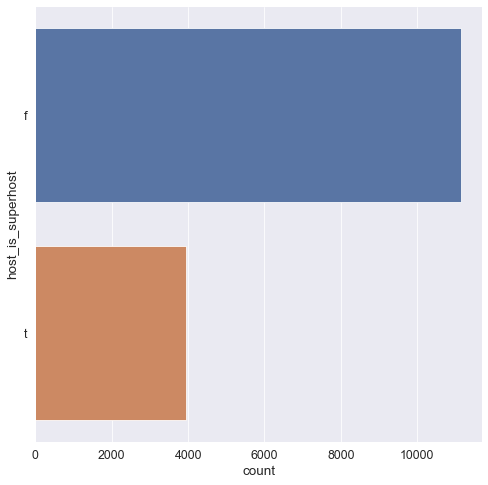

In [302]:

sns.countplot(y='host_is_superhost',data=df_temp)
sns.despine()

<function matplotlib.pyplot.show(close=None, block=None)>

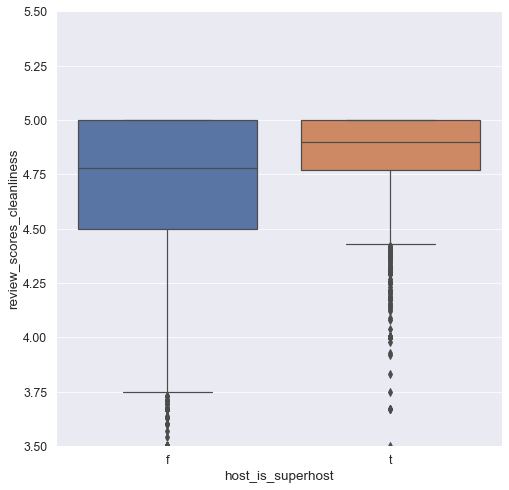

In [303]:
sns.boxplot(x='host_is_superhost',y='review_scores_cleanliness',data=df_temp)
plt.ylim(3.5, 5.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

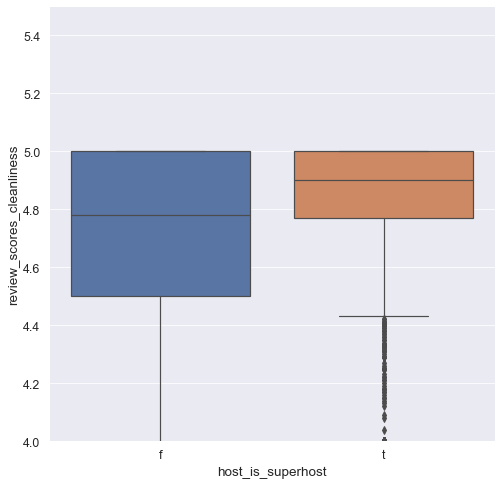

In [304]:
sns.boxplot(x='host_is_superhost',y='review_scores_cleanliness',data=df_temp)
plt.ylim(4, 5.5)
plt.show

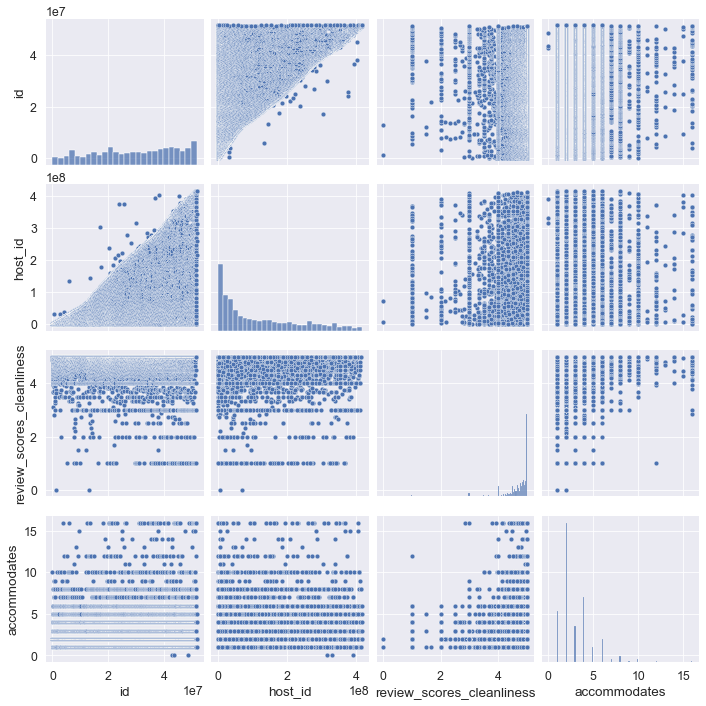

In [305]:
sns.pairplot(df_temp)

In [306]:
df_temp['host_is_superhost'].describe(include ='object')

count     15077
unique        2
top           f
freq      11134
Name: host_is_superhost, dtype: object

In [307]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15084 entries, 0 to 15083
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         15084 non-null  int64  
 1   name                       15083 non-null  object 
 2   host_id                    15084 non-null  int64  
 3   host_name                  15077 non-null  object 
 4   host_is_superhost          15077 non-null  object 
 5   price                      15084 non-null  object 
 6   review_scores_cleanliness  11437 non-null  float64
 7   accommodates               15084 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 942.9+ KB


### Task-2: Analysis Pipeline

#### Loading and cleaning data

In [308]:
df = pd.read_csv ("../data/raw/listings.csv")
df1 = df[["id", 'name', 'host_id', 'host_name', 'host_is_superhost','price','review_scores_cleanliness','accommodates' ]].sort_values("review_scores_cleanliness",ascending=False, ignore_index=True)


df1


,id,name,host_id,host_name,host_is_superhost,price,review_scores_cleanliness,accommodates
0,1419,Beautiful home in amazing area!,1565,Alexandra,f,$469.00,5.0,10
1,32735994,New Modern Downtown 1 Bedroom Apt Prime Location,9923100,Ed,t,$82.00,5.0,2
2,32814111,King Bed CN Tower Suite w/Balcony 2TV’S & Parking,212832355,Alan Owner Of Luxury Residences,t,$300.00,5.0,4
3,32811056,"Private, Spacious w/Kitchen & Laundry by Greek...",58473437,Jenny,t,$95.00,5.0,4
4,32793995,"Furnished room in friendly, nice and quiet house.",133665417,Ray,f,$45.00,5.0,1
...,...,...,...,...,...,...,...,...
15079,51492931,Spacious Studio Apartment Downtown Toronto Sma...,311805447,Anthony,f,$71.00,NaN,2
15080,51493223,Elegant One Bedroom Condo in Core Downtown,416677873,Debashis,f,$109.00,NaN,2
15081,51493266,Bright large 2 bedrooms apt with separate entr...,259499767,Sue,f,$106.00,NaN,4
15082,51493385,2 BR Condo Downtown with CN Tower View,416677873,Debashis,f,$263.00,NaN,5


#### Process data for review clean

In [309]:

clean = df1[['host_is_superhost','review_scores_cleanliness']]
clean =  clean[clean['review_scores_cleanliness'].notna()]
clean

,host_is_superhost,review_scores_cleanliness
0,f,5.0
1,t,5.0
2,t,5.0
3,t,5.0
4,f,5.0
...,...,...
11432,f,1.0
11433,f,1.0
11434,f,1.0
11435,f,0.0


In [310]:
cleanmean = clean.groupby("host_is_superhost", as_index=False).mean()
cleanmean

,host_is_superhost,review_scores_cleanliness
0,f,4.605607
1,t,4.837693


#### process data for price


In [311]:
pr = df1[['host_is_superhost', 'accommodates', 'price']]
pr['price'] = pr['price'].str.replace('$','')
pr['price'] = pr['price'].str.replace(',','')
pr['price'] = pr.price.astype(float)
price_processed = pr.groupby(["host_is_superhost","accommodates"],as_index=False).mean()
price_processed.drop(price_processed[price_processed['price']==0].index, inplace=True)

price_processed

C:\Users\Rohith\AppData\Local\Temp/ipykernel_11844/3787448051.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pr['price'] = pr['price'].str.replace('$','')
C:\Users\Rohith\AppData\Local\Temp/ipykernel_11844/3787448051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr['price'] = pr['price'].str.replace('$','')
C:\Users\Rohith\AppData\Local\Temp/ipykernel_11844/3787448051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,host_is_superhost,accommodates,price
1,f,1,86.083049
2,f,2,125.405508
3,f,3,148.457384
4,f,4,188.607746
5,f,5,214.183673
6,f,6,284.306011
7,f,7,256.096154
8,f,8,444.367568
9,f,9,449.083333
10,f,10,390.434783


#### Wrangle Data

In [312]:

cleanmean = cleanmean.rename(columns = {"host_is_superhost" : "Is_Super_Host", "review_scores_cleanliness": "mean of cleanliness review"})
cleanmean['Is_Super_Host'] = cleanmean.Is_Super_Host.replace({'t':'Super host', 'f':'normal host'})
cleanmean

,Is_Super_Host,mean of cleanliness review
0,normal host,4.605607
1,Super host,4.837693


In [313]:
price_processed = price_processed.rename(columns = {'price' :"mean of the prices"})
price_processed['host_is_superhost'] = price_processed.host_is_superhost.replace({'t':'Super host', 'f':'normal host'})
price_processed

,host_is_superhost,accommodates,mean of the prices
1,normal host,1,86.083049
2,normal host,2,125.405508
3,normal host,3,148.457384
4,normal host,4,188.607746
5,normal host,5,214.183673
6,normal host,6,284.306011
7,normal host,7,256.096154
8,normal host,8,444.367568
9,normal host,9,449.083333
10,normal host,10,390.434783


### Task-3: Method Chaining

In [314]:
import project_functions1 as p1
data = "../data/raw/listings.csv"
df = p1.unprocessed(data)


In [315]:
df1,clean,price = p1.load(data)
df1

,id,name,host_id,host_name,host_is_superhost,price,review_scores_cleanliness,accommodates
0,1419,Beautiful home in amazing area!,1565,Alexandra,f,$469.00,5.0,10
1,32735994,New Modern Downtown 1 Bedroom Apt Prime Location,9923100,Ed,t,$82.00,5.0,2
2,32814111,King Bed CN Tower Suite w/Balcony 2TV’S & Parking,212832355,Alan Owner Of Luxury Residences,t,$300.00,5.0,4
3,32811056,"Private, Spacious w/Kitchen & Laundry by Greek...",58473437,Jenny,t,$95.00,5.0,4
4,32793995,"Furnished room in friendly, nice and quiet house.",133665417,Ray,f,$45.00,5.0,1
...,...,...,...,...,...,...,...,...
15079,51492931,Spacious Studio Apartment Downtown Toronto Sma...,311805447,Anthony,f,$71.00,NaN,2
15080,51493223,Elegant One Bedroom Condo in Core Downtown,416677873,Debashis,f,$109.00,NaN,2
15081,51493266,Bright large 2 bedrooms apt with separate entr...,259499767,Sue,f,$106.00,NaN,4
15082,51493385,2 BR Condo Downtown with CN Tower View,416677873,Debashis,f,$263.00,NaN,5


In [316]:
clean

,host_is_superhost,review_scores_cleanliness
0,f,5.0
1,t,5.0
2,t,5.0
3,t,5.0
4,f,5.0
...,...,...
11432,f,1.0
11433,f,1.0
11434,f,1.0
11435,f,0.0


In [317]:
price

,host_is_superhost,accommodates,price
0,f,10,$469.00
1,t,2,$82.00
2,t,4,$300.00
3,t,4,$95.00
4,f,1,$45.00
...,...,...,...
15079,f,2,$71.00
15080,f,2,$109.00
15081,f,4,$106.00
15082,f,5,$263.00


In [318]:
clean_processed = p1.process_clean(clean)
clean_processed

,host_is_superhost,review_scores_cleanliness
0,f,4.605607
1,t,4.837693


In [319]:
price_procs = p1.process_price(price)

C:\Users\Rohith\data301\project-group11-project\notebooks\project_functions1.py:28: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pr['price'] = pr['price'].str.replace('$','')
C:\Users\Rohith\data301\project-group11-project\notebooks\project_functions1.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr['price'] = pr['price'].str.replace('$','')


In [320]:
price_procs

,host_is_superhost,accommodates,price
1,f,1,86.083049
2,f,2,125.405508
3,f,3,148.457384
4,f,4,188.607746
5,f,5,214.183673
6,f,6,284.306011
7,f,7,256.096154
8,f,8,444.367568
9,f,9,449.083333
10,f,10,390.434783


In [321]:
cleanmean = p1.wrang_clean(cleanmean)
cleanmean

,Is_Super_Host,mean of cleanliness review
0,normal host,4.605607
1,Super host,4.837693


In [322]:
price_processed = p1.wrang_price(price_processed)
price_processed

,host_is_superhost,accommodates,mean of the prices
1,normal host,1,86.083049
2,normal host,2,125.405508
3,normal host,3,148.457384
4,normal host,4,188.607746
5,normal host,5,214.183673
6,normal host,6,284.306011
7,normal host,7,256.096154
8,normal host,8,444.367568
9,normal host,9,449.083333
10,normal host,10,390.434783


### Task-4: Data Visualization 

(3000.0, 8000.0)

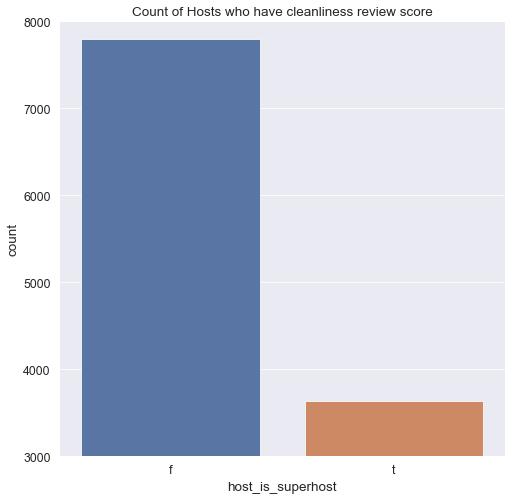

In [323]:

sns.countplot(x = 'host_is_superhost', data = clean).set(title = 'Count of Hosts who have cleanliness review score')
plt.ylim(3000,8000)

(4.0, 5.0)

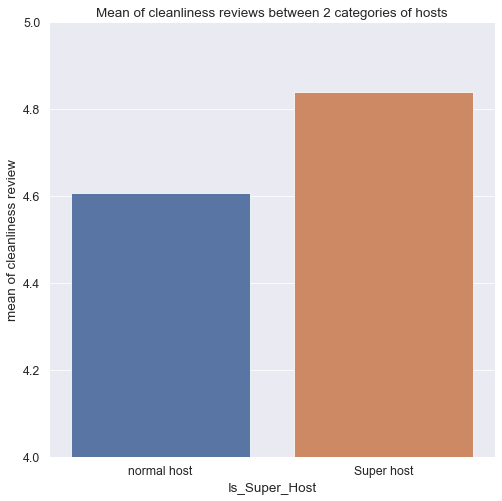

In [324]:

sns.barplot(x='Is_Super_Host',y='mean of cleanliness review',data=cleanmean).set(title ='Mean of cleanliness reviews between 2 categories of hosts')
plt.ylim(4,5)

In [325]:
## some lies of this code is extracted from lecture contet - week 8 and https://stackoverflow.com/questions/51241575/calculate-correlation-between-columns-of-strings
sns.set_context('paper', font_scale=1.4)
clean_temp = clean
clean_temp['host_is_superhost'] = clean_temp['host_is_superhost'].astype('category').cat.codes
clean_temp = clean_temp.corr()


(3000.0, 12000.0)

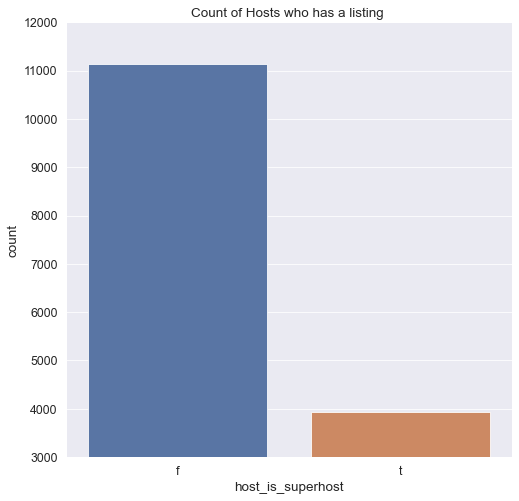

In [326]:

sns.countplot(x = 'host_is_superhost', data = price).set(title = 'Count of Hosts who has a listing ')
plt.ylim(3000,12000)

[Text(0.5, 1.0, 'Mean of the prices based on accomodation size of both categories of hosts')]

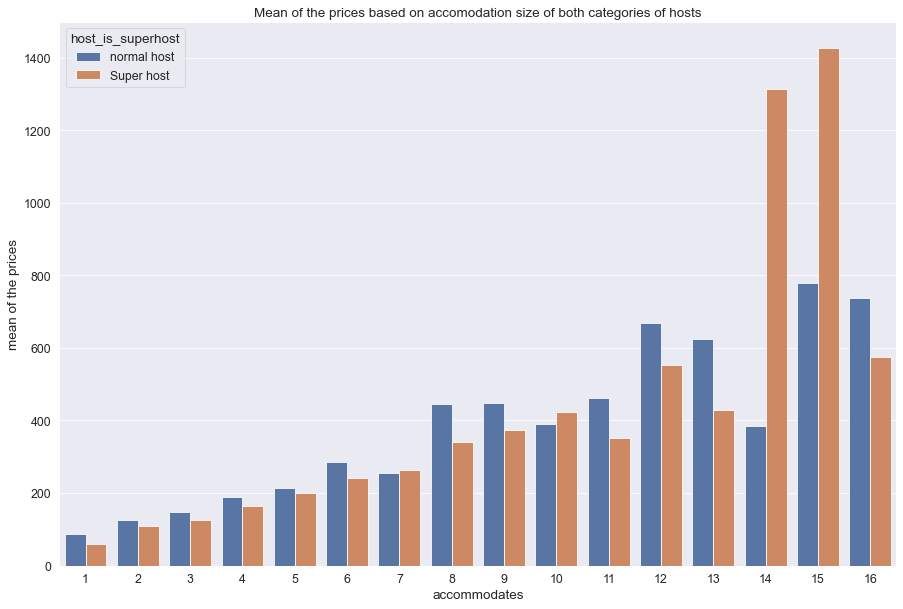

In [327]:
plt.figure(figsize = (15,10))

sns.barplot(x='accommodates',y='mean of the prices',data=price_processed, hue = "host_is_superhost").set(title ='Mean of the prices based on accomodation size of both categories of hosts')
